In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

import pickle
import time



In [3]:
# a helper function to plot graphs

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Import Data

In [37]:
df = pd.read_csv('processed_df\metacritic_comments_nlp.csv')
df.head()

# df = pickle.load(open('processed_df\preprocessed_nlp_5p.pkl','rb'))
# df.head()

,Title,Userscore,Comment,lang
0,The Legend of Zelda: Ocarina of Time,10.0,"Everything in OoT is so near at perfection, it...",en
1,The Legend of Zelda: Ocarina of Time,10.0,I won't bore you with what everyone is already...,en
2,The Legend of Zelda: Ocarina of Time,10.0,Anyone who gives the masterpiece below a 7 or ...,en
3,The Legend of Zelda: Ocarina of Time,10.0,I'm one of those people who think that this is...,en
4,The Legend of Zelda: Ocarina of Time,10.0,This game is the highest rated game on Metacr...,en


In [38]:
print(f'shape before: {df.shape}')
df = df[df['Comment'] != '']
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f'shape after: {df.shape}')


shape before: (249031, 4)
shape after: (249031, 4)


# Train test split

In [52]:
X = df['Comment']
y = df['Userscore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the text encoder

In [46]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [47]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'to', 'is', 'of', 'game', 'i',
       'it', 'you', 'this', 'in', 'that', 'for', 'but', 'are', 'with',
       'its'], dtype='<U14')

In [48]:
vocab.shape

(1000,)

In [54]:
1+1

2

# Embedding our corpus with a pretrained TF HUB model

In [34]:
!pip install tensorflow_hub

     -------------------------------------- 108.8/108.8 kB 3.2 MB/s eta 0:00:00


In [49]:
import tensorflow_hub as hub

In [50]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [53]:
hub_layer(list(X_train)[0][0])

ValueError: Exception encountered when calling layer "keras_layer_1" "                 f"(type KerasLayer).

Python inputs incompatible with input_signature:
  inputs: (
     )
  input_signature: (
    TensorSpec(shape=(None,), dtype=tf.string, name=None)).

Call arguments received by layer "keras_layer_1" "                 f"(type KerasLayer):
  • inputs=' '
  • training=None

# Create the model

In [25]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss = "mean_squared_error", optimizer=opt, metrics=['mean_absolute_error'])

In [33]:

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=50, batch_size=256)


Epoch 1/50


InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Can not squeeze dim[1], expected a dimension of 1, got 460
	 [[{{node mean_squared_error/weighted_loss/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_bool_Squeeze}}]]
	 [[broadcast_weights_1/assert_broadcastable/is_valid_shape/else/_1/broadcast_weights_1/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/then/_53/broadcast_weights_1/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat/_64]]
  (1) INVALID_ARGUMENT:  Can not squeeze dim[1], expected a dimension of 1, got 460
	 [[{{node mean_squared_error/weighted_loss/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_bool_Squeeze}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2785]

In [44]:
feat_names = bow_vec.get_feature_names_out()

In [9]:
bow_mat_tr = pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)
bow_mat_te = pd.DataFrame(X_te_proc.toarray(), columns = feat_names)

In [49]:
bow_mat_tr.shape

(164710, 165)

# MODEL

- BASELINE, 165 VOL

In [65]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 1e-6, verbose = 1, patience=5)

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(165,)))
model_1.add(Dense(30, activation='relu'))
model_1.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_1.compile(loss = "mean_squared_error", optimizer=opt, metrics=['mean_absolute_error'])

In [66]:
start = time.time()

results_1 = model_1.fit(bow_mat_tr, y_train, validation_split = 0.2, epochs=50, batch_size=256, callbacks=[callback])

end = time.time()
print(f'{end-start} secs slipped...')

Epoch 1/50
515/515 [==============================] - 1s 2ms/step - loss: 53.9833 - mean_absolute_error: 6.8724 - val_loss: 25.4873 - val_mean_absolute_error: 4.6205
Epoch 2/50
515/515 [==============================] - 1s 2ms/step - loss: 12.5975 - mean_absolute_error: 3.0499 - val_loss: 8.9558 - val_mean_absolute_error: 2.4840
Epoch 3/50
515/515 [==============================] - 1s 2ms/step - loss: 8.0863 - mean_absolute_error: 2.3283 - val_loss: 7.3771 - val_mean_absolute_error: 2.1982
Epoch 4/50
515/515 [==============================] - 1s 2ms/step - loss: 6.7068 - mean_absolute_error: 2.0699 - val_loss: 6.2057 - val_mean_absolute_error: 1.9665
Epoch 5/50
515/515 [==============================] - 1s 2ms/step - loss: 5.8001 - mean_absolute_error: 1.8865 - val_loss: 5.5343 - val_mean_absolute_error: 1.8328
Epoch 6/50
515/515 [==============================] - 1s 2ms/step - loss: 5.2995 - mean_absolute_error: 1.7873 - val_loss: 5.1543 - val_mean_absolute_error: 1.7605
Epoch 7/50
51

In [68]:
history_dict = results_1.history
history_dict.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

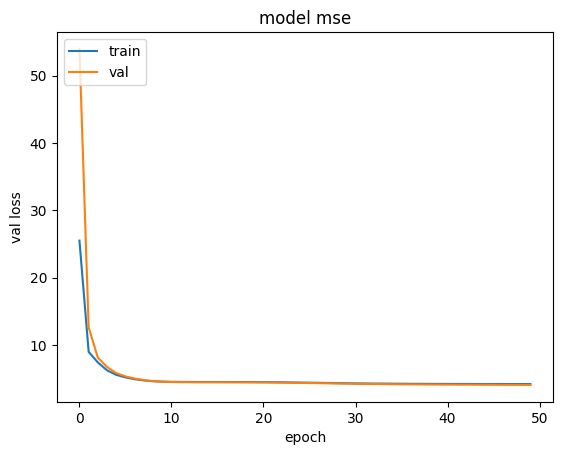

In [69]:
plt.plot(results_1.history['val_loss'])
plt.plot(results_1.history['loss'])
plt.title('model mse')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

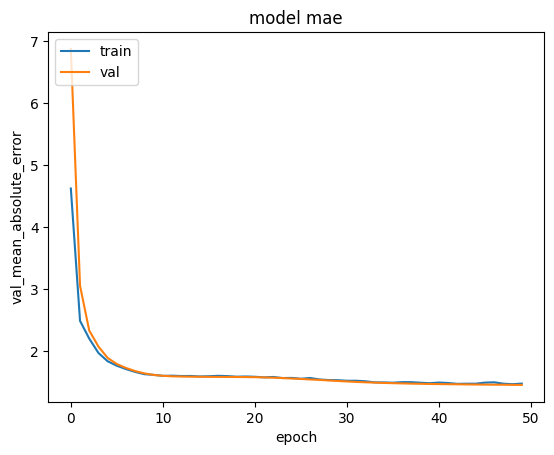

In [70]:
plt.plot(results_1.history['val_mean_absolute_error'])
plt.plot(results_1.history['mean_absolute_error'])
plt.title('model mae')
plt.ylabel('val_mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
model_1.evaluate(bow_mat_te, y_test)

2206/2206 [==============================] - 3s 1ms/step - loss: 4.1660 - mean_absolute_error: 1.4742


[4.165985107421875, 1.4741941690444946]

In [72]:
y_pred = model_1.predict(bow_mat_te)
print(f'test MSE {mean_squared_error(y_test, y_pred)}')
print(f'test MAE {mean_absolute_error(y_test, y_pred)}')

y_pred = model_1.predict(bow_mat_tr)
print(f'train MSE {mean_squared_error(y_train, y_pred)}')
print(f'train MAE {mean_absolute_error(y_train, y_pred)}')

2206/2206 [==============================] - 2s 762us/step
test MSE 4.165985756996066
test MAE 1.4741940736834802
5148/5148 [==============================] - 4s 716us/step
train MSE 4.05468775974925
train MAE 1.4542828798380918


run on full dataset, 164,710<br>
165 vocabulary

- BASELINE, 2000 VOL

In [98]:
bow_200_tr, bow_200_te = TFvec(200,X_train, X_test)

8.123414278030396 secs slipped..


In [128]:
start = time.time()

bow_vec = TfidfVectorizer(max_features=400)
X_tr_proc = bow_vec.fit_transform(X_train)
X_te_proc = bow_vec.transform(X_test)

end = time.time()
print(f'{end-start} secs slipped..')

feat_names = bow_vec.get_feature_names_out()

bow_400_tr = pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)
bow_400_te = pd.DataFrame(X_te_proc.toarray(), columns = feat_names)

bow_400_tr.shape, bow_400_te.shape

8.278271198272705 secs slipped..


((164710, 400), (70591, 400))

In [129]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 1e-6, verbose = 1, patience=5)

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(400,)))
model_3.add(Dense(30, activation='relu'))
model_3.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_3.compile(loss = "mean_squared_error", optimizer=opt, metrics=['mean_absolute_error'])

In [130]:
start = time.time()

results_3 = model_3.fit(bow_400_tr, y_train, validation_split = 0.2, epochs=5, batch_size=1, callbacks=[callback])

end = time.time()
print(f'{end-start} secs slipped...')

RuntimeError: Data adapters should be mutually exclusive for handling inputs. Found multiple adapters [<class 'keras.engine.data_adapter.TensorLikeDataAdapter'>, <class 'keras.engine.data_adapter.GeneratorDataAdapter'>] to handle input: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>

- man tuning

In [38]:
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(167,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_2.compile(loss = "mean_squared_error", optimizer=opt, metrics=['mean_absolute_error'])

In [39]:
results_2 = model_2.fit(bow_mat_tr, y_train, validation_split = 0.2, epochs=50, batch_size=256)

Epoch 1/50
155/155 [==============================] - 1s 5ms/step - loss: 70.4130 - mean_absolute_error: 8.0318 - val_loss: 68.1437 - val_mean_absolute_error: 7.8833
Epoch 2/50
155/155 [==============================] - 1s 4ms/step - loss: 64.4407 - mean_absolute_error: 7.6459 - val_loss: 58.4009 - val_mean_absolute_error: 7.2343
Epoch 3/50
155/155 [==============================] - 1s 4ms/step - loss: 49.4364 - mean_absolute_error: 6.5950 - val_loss: 37.6234 - val_mean_absolute_error: 5.6940
Epoch 4/50
155/155 [==============================] - 1s 4ms/step - loss: 26.7214 - mean_absolute_error: 4.6920 - val_loss: 16.1360 - val_mean_absolute_error: 3.6235
Epoch 5/50
155/155 [==============================] - 1s 4ms/step - loss: 13.0855 - mean_absolute_error: 3.1389 - val_loss: 9.7706 - val_mean_absolute_error: 2.6720
Epoch 6/50
155/155 [==============================] - 1s 4ms/step - loss: 10.6019 - mean_absolute_error: 2.7120 - val_loss: 8.9779 - val_mean_absolute_error: 2.4943
Epoch 

In [40]:
history_dict = results_2.history
history_dict.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

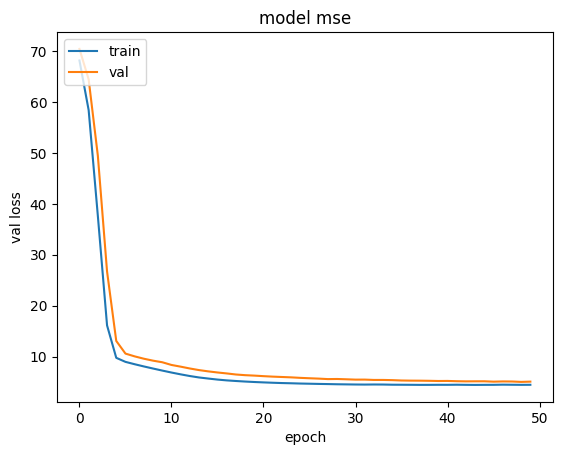

In [41]:
plt.plot(results_2.history['val_loss'])
plt.plot(results_2.history['loss'])
plt.title('model mse')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
model_2.evaluate(bow_mat_te, y_test)

662/662 [==============================] - 1s 2ms/step - loss: 4.6183 - mean_absolute_error: 1.6565


[4.618277072906494, 1.6564968824386597]

In [49]:
y_pred = model_2.predict(bow_mat_te)
print(f'test MSE {mean_squared_error(y_test, y_pred)}')
print(f'test MAE {mean_absolute_error(y_test, y_pred)}')

y_pred = model_2.predict(bow_mat_tr)
print(f'train MSE {mean_squared_error(y_train, y_pred)}')
print(f'train MAE {mean_absolute_error(y_train, y_pred)}')

662/662 [==============================] - 1s 1ms/step
test MSE 4.618279038637183
test MAE 1.6564970497010443
1544/1544 [==============================] - 2s 1ms/step
train MSE 4.442326709816271
train MAE 1.629030653656125


# IMPUTE USERSCORE FOR STEAM REVIEWS

In [50]:
df_steam = pd.read_csv('processed_df\steam_review_nlp.csv')
df_steam.head()

,title,user_review,user_suggestion
0,Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1
1,Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1
2,Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1
3,Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1
4,Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1


In [51]:
df_steam = df_steam['user_review']

In [58]:
X_imp = bow_vec.transform(df_steam)

In [59]:
y_pred = model_1.predict(X_imp)

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,153] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]